In [84]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score


In [ ]:
# Chronic Kidney Disease Dataset link:
#https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease

In [85]:
data= pd.read_csv('chronic_kidney_disease2.csv')

In [86]:
data=data.replace('?', np.nan)

In [87]:
numeric_columns = ['age', 'bp','sg','bgr', 'bu', 'sc', 'sod', 'pot',
                   'hemo', 'pcv',"wbcc","rbcc",'al', 'su']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
    data[col] = data[col].fillna(data[col].mean())


In [88]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.000000,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,144.515419,...,38.0,6000.000000,4.774455,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,42.0,7500.000000,4.774455,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34.0,70.0,1.015,2.0,0.0,normal,normal,notpresent,notpresent,144.515419,...,41.0,8594.817432,4.774455,no,no,no,good,no,no,notckd
996,54.0,70.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,76.000000,...,52.0,8400.000000,5.900000,no,no,no,good,no,no,notckd
997,20.0,70.0,1.020,0.0,0.0,abnormal,abnormal,present,notpresent,111.000000,...,44.0,5500.000000,4.800000,no,no,yes,good,no,no,ckd
998,56.0,90.0,1.010,4.0,1.0,normal,NaN,notpresent,present,176.000000,...,48.0,5400.000000,5.500000,no,no,no,poor,no,no,notckd


In [89]:
columns_to_impute = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
for col in columns_to_impute:
        data[col] = data.groupby('class')[col].transform(lambda x: x.fillna(x.mode()[0]))


In [90]:
data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.000000,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.000000,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.000000,1.020,4.0,0.0,normal,normal,notpresent,notpresent,144.515419,...,38.0,6000.000000,4.774455,no,no,no,good,no,no,ckd
2,62.0,80.000000,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,42.0,7500.000000,4.774455,no,yes,no,poor,no,yes,ckd
3,48.0,70.000000,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.000000,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.000000,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.000000,4.600000,no,no,no,good,no,no,ckd
5,60.0,90.000000,1.015,3.0,0.0,normal,normal,notpresent,notpresent,74.000000,...,17.0,9400.000000,4.400000,yes,yes,no,good,yes,no,ckd
6,68.0,70.000000,1.010,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,36.0,8594.817432,4.774455,no,no,no,good,no,no,ckd
7,24.0,75.591054,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.000000,...,44.0,6900.000000,5.000000,no,yes,no,good,yes,no,ckd
8,52.0,100.000000,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.000000,...,33.0,9600.000000,3.800000,yes,yes,no,good,no,yes,ckd
9,53.0,90.000000,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.000000,...,29.0,12100.000000,3.700000,yes,yes,no,poor,no,yes,ckd


In [91]:
# Define your binary mapping
binary_map = {
    'yes': 1, 'no': 0,
    'present': 1, 'notpresent': 0,
    'abnormal': 1, 'normal': 0,
    'good': 1, 'poor': 0
}

# List of categorical columns to encode
binary_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Apply mapping
for col in binary_cols:
    data[col] = data[col].map(binary_map)


In [92]:
data.dropna(inplace=True)

In [93]:
X=data.drop(columns=['class'])
y=data['class']

In [94]:
X_scaled= StandardScaler().fit_transform(X)

In [95]:
X_train_scaled,X_test_scaled,y_train_s,y_test_s=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [96]:
X_test_scaled.shape

(190, 24)

In [97]:
log_model = LogisticRegression(max_iter=1000)  # Increase max_iter to ensure convergence
log_model.fit(X_train_scaled, y_train_s)


LogisticRegression(max_iter=1000)

In [98]:
y_pred_log = log_model.predict(X_test_scaled)


In [99]:
y_test_s.shape

(190,)

In [100]:
y_pred_log.shape

(190,)

In [101]:

print("Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test_s, y_pred_log))
print("Precision:", precision_score(y_test_s, y_pred_log, pos_label='ckd'))  # or pos_label=1
print("Recall:", recall_score(y_test_s, y_pred_log, pos_label='ckd'))
print("F1 Score:", f1_score(y_test_s, y_pred_log, pos_label='ckd'))
print("Confusion Matrix:\n", confusion_matrix(y_test_s, y_pred_log))


Logistic Regression Results:
Accuracy: 0.8947368421052632
Precision: 0.8941176470588236
Recall: 0.8735632183908046
F1 Score: 0.8837209302325582
Confusion Matrix:
 [[76 11]
 [ 9 94]]


In [102]:
scores = cross_val_score(log_model, X_scaled, y, cv=5)
print("Cross-validation Accuracy:", scores.mean())


Cross-validation Accuracy: 0.8842105263157896


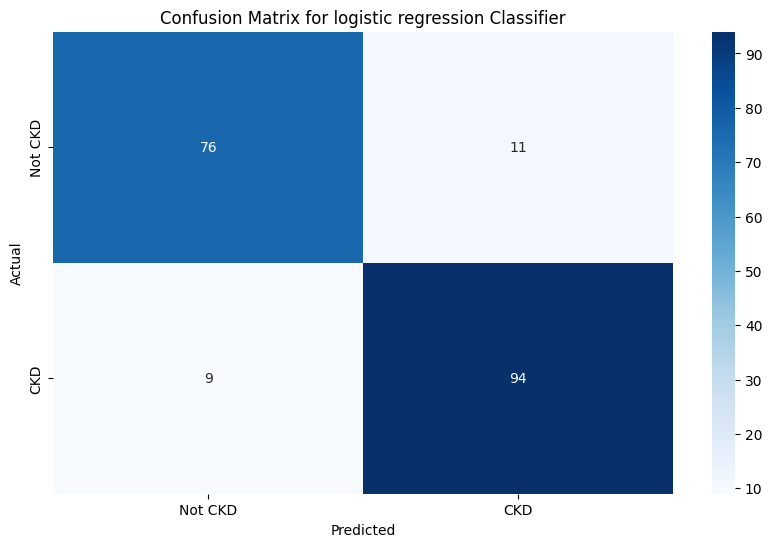

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_s, y_pred_log), annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix for logistic regression Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [111]:



gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train_s)
y_pred_gnb = gnb.predict(X_test_scaled)

print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test_s, y_pred_gnb))
print("Precision:", precision_score(y_test_s, y_pred_gnb, pos_label='ckd'))
print("Recall:", recall_score(y_test_s, y_pred_gnb, pos_label='ckd'))
print("F1 Score:", f1_score(y_test_s, y_pred_gnb, pos_label='ckd'))



Gaussian Naive Bayes:
Accuracy: 0.8842105263157894
Precision: 0.8494623655913979
Recall: 0.9080459770114943
F1 Score: 0.8777777777777778


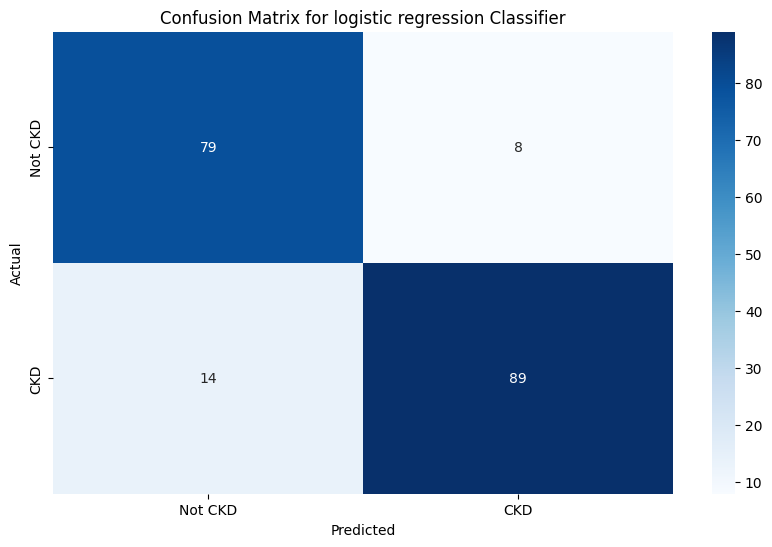

In [112]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_s, y_pred_gnb), annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix for logistic regression Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [106]:
n_scores = cross_val_score(gnb, X_scaled, y, cv=5)
print("Gaussian Naive Bayes Cross-validation Accuracy:", n_scores.mean())

Gaussian Naive Bayes Cross-validation Accuracy: 0.8957894736842105


In [114]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train_s)
y_pred_knn = knn.predict(X_test_scaled)

print("\nK-Nearest Neighbors:")
print("Accuracy:", accuracy_score(y_test_s, y_pred_knn))
print("Precision:", precision_score(y_test_s, y_pred_knn, pos_label='ckd'))
print("Recall:", recall_score(y_test_s, y_pred_knn, pos_label='ckd'))
print("F1 Score:", f1_score(y_test_s, y_pred_knn, pos_label='ckd'))



K-Nearest Neighbors:
Accuracy: 0.9
Precision: 0.8953488372093024
Recall: 0.8850574712643678
F1 Score: 0.8901734104046243


In [115]:
k_score=cross_val_score(knn, X_scaled, y, cv=5)
print("K-Nearest Neighbors Cross-validation Accuracy:", k_score.mean())

K-Nearest Neighbors Cross-validation Accuracy: 0.8600000000000001


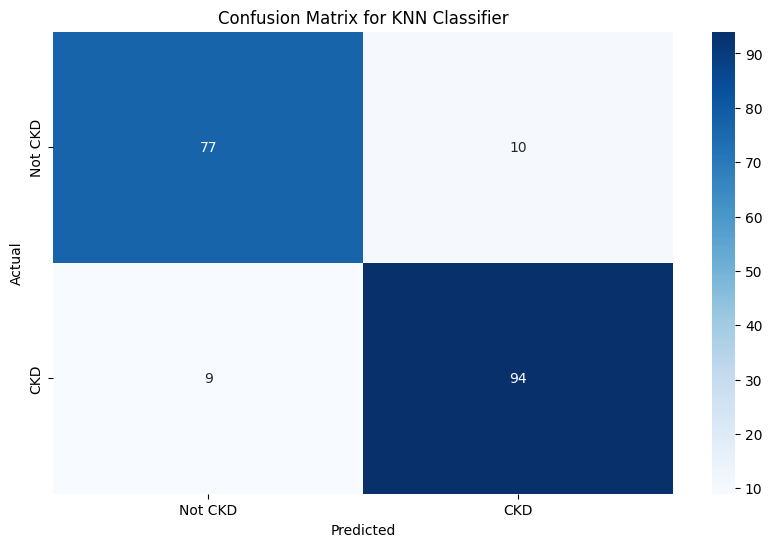

In [116]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test_s, y_pred_knn), annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix for KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [117]:
#random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train_s)
y_pred_rf = rf.predict(X_test_scaled)

In [118]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test_s, y_pred_rf))
print("Precision:", precision_score(y_test_s, y_pred_rf, pos_label='ckd'))
print("Recall:", recall_score(y_test_s, y_pred_rf, pos_label='ckd'))
print("F1 Score:", f1_score(y_test_s, y_pred_rf, pos_label='ckd'))
rf_score = cross_val_score(rf, X_scaled, y, cv=5)
print("Random Forest Cross-validation Accuracy:", rf_score.mean())


Random Forest:
Accuracy: 0.9052631578947369
Precision: 0.8709677419354839
Recall: 0.9310344827586207
F1 Score: 0.9
Random Forest Cross-validation Accuracy: 0.9231578947368421


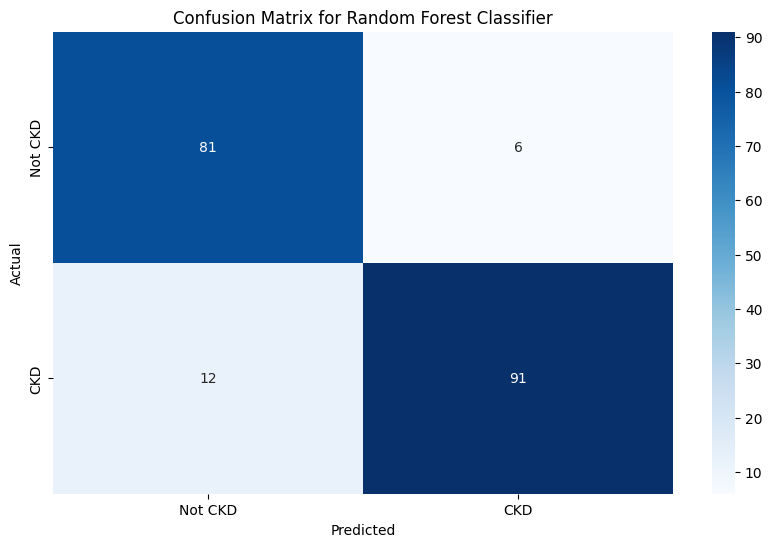

In [119]:
fig_Size = (10, 6)
plt.figure(figsize=fig_Size)
sns.heatmap(confusion_matrix(y_test_s, y_pred_rf), annot=True, fmt='d', cmap='Blues', xticklabels=['Not CKD', 'CKD'], yticklabels=['Not CKD', 'CKD'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()